In [1]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 5.0 MB 885 kB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 7.4 MB/s eta 0:00:01
     |████████████████████████████████| 140 kB 8.8 MB/s eta 0:00:01
     |████████████████████████████████| 110 kB 856 kB/s eta 0:00:01
     |████████████████████████████████| 179 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 162 kB 3.7 MB/s eta 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21502 sha256=857a8f56ea0d8f2f856aac9254256d1d01384d48913ebc57992361372693476c
  Stored in directory: /Users/delinaivanova/Library/Caches/pip/wheels/e1/e8/83/ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3
You should consider upgrading via the '/Appl

In [3]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
(train, test) = tfds.load('mnist', split=['train','test'])

2024-11-06 20:37:10.656462: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...: 100%|██████████| 5/5 [00:24<00:00,  4.89s/ file]

Dataset mnist downloaded and prepared to /Users/delinaivanova/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [25]:
def load_dataset(train_size, test_size):
    train, test = tf.keras.datasets.mnist.load_data()

    # take a sample
    train_idx = np.random.randint(low=0, high=train[0].shape[0], size=train_size)
    test_idx = np.random.randint(low=0, high=test[0].shape[0], size=test_size)
    X_train = train[0][train_idx].reshape(-1,28*28)
    y_train = train[1][train_idx].reshape(-1,1)
    X_test = test[0][test_idx].reshape(-1,28*28)
    y_test = test[1][test_idx].reshape(-1,1)

    scale = StandardScaler()
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)

    OH = OneHotEncoder(categories='auto', sparse_output=False)
    y_train = OH.fit_transform(y_train)
    y_test = OH.transform(y_test)

    print('X_train:',X_train.shape)
    print('y_train:',y_train.shape)
    print('X_test:',X_test.shape)
    print('y_test:',y_test.shape)
    print('Min:', X_train.min())
    print('Max:', X_train.max())

    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = load_dataset(60000, 10000)

X_train: (60000, 784)
y_train: (60000, 10)
X_test: (10000, 784)
y_test: (10000, 10)
Min: -1.2758006867956282
Max: 244.9469330285864


In [14]:
from tensorflow.keras import layers

In [27]:
def simple_model(initializer, activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(32, activation, kernel_initializer = initializer),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())
    ])

In [30]:
init = tf.initializers.zeros()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_zeros = simple_model(init, activate)
model_zeros.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
model_zeros.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1068 - loss: 2.3025 - val_accuracy: 0.1149 - val_loss: 2.3021
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1109 - loss: 2.3021 - val_accuracy: 0.1149 - val_loss: 2.3017
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1123 - loss: 2.3018 - val_accuracy: 0.1149 - val_loss: 2.3015
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1133 - loss: 2.3015 - val_accuracy: 0.1149 - val_loss: 2.3013
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1119 - loss: 2.3015 - val_accuracy: 0.1149 - val_loss: 2.3012
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1125 - loss: 2.3014 - val_accuracy: 0.1149 - val_loss: 2.3011
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1123 - loss: 2.3014 - val_accuracy: 0.1149 - val_loss: 2.3011
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1139 - loss: 2.3012 - val_accuracy: 0.1149 - val_loss

In [34]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_normal = simple_model(init, activate)
model_normal.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_normal.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1210 - loss: 2.3026 - val_accuracy: 0.1409 - val_loss: 2.3006
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1355 - loss: 2.3001 - val_accuracy: 0.1306 - val_loss: 2.2979
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1320 - loss: 2.2973 - val_accuracy: 0.1348 - val_loss: 2.2948
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1379 - loss: 2.2942 - val_accuracy: 0.1386 - val_loss: 2.2903
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1450 - loss: 2.2891 - val_accuracy: 0.1515 - val_loss: 2.2829
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1616 - loss: 2.2802 - val_accuracy: 0.1796 - val_loss: 2.2697
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1902 - loss: 2.2649 - val_accuracy: 0.2108 - val_loss: 2.2438
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2245 - loss: 2.2335 - val_accuracy: 0.2559 - val_loss

In [38]:
init = tf.initializers.glorot_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_uniform = simple_model(init, activate)
model_uniform.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_uniform.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1016 - loss: 2.3094 - val_accuracy: 0.3004 - val_loss: 2.1996
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3520 - loss: 2.1238 - val_accuracy: 0.5292 - val_loss: 1.6980
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5613 - loss: 1.5405 - val_accuracy: 0.6887 - val_loss: 1.0420
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7268 - loss: 0.9548 - val_accuracy: 0.8209 - val_loss: 0.6577
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8290 - loss: 0.6309 - val_accuracy: 0.8658 - val_loss: 0.4796
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8665 - loss: 0.4722 - val_accuracy: 0.8882 - val_loss: 0.3983
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8861 - loss: 0.3973 - val_accuracy: 0.9001 - val_loss: 0.3497
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8988 - loss: 0.3493 - val_accuracy: 0.9092 - val_loss

In [37]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_he = simple_model(init, activate)
model_he.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_he.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2763 - loss: 2.1564 - val_accuracy: 0.5952 - val_loss: 1.3847
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6659 - loss: 1.1735 - val_accuracy: 0.8092 - val_loss: 0.6951
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8255 - loss: 0.6182 - val_accuracy: 0.8614 - val_loss: 0.4971
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8680 - loss: 0.4454 - val_accuracy: 0.8882 - val_loss: 0.3973
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8929 - loss: 0.3640 - val_accuracy: 0.8992 - val_loss: 0.3549
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9058 - loss: 0.3164 - val_accuracy: 0.9093 - val_loss: 0.3287
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9116 - loss: 0.2872 - val_accuracy: 0.9179 - val_loss: 0.3059
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9194 - loss: 0.2645 - val_accuracy: 0.9214 - val_loss: 0.2908
Ep

Text(0, 0.5, 'validation accuracy')

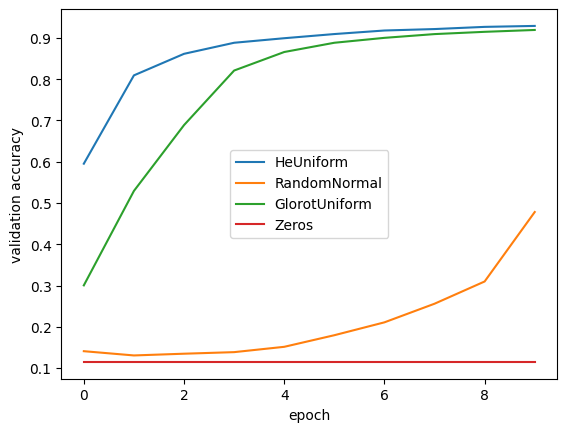

In [39]:
for i in [model_he, model_normal, model_uniform, model_zeros]:
    plt.plot(i.history.history['val_accuracy'], label=i.get_config()['layers'][1]['config']['kernel_initializer']['class_name'])

plt.legend()
plt.xlabel('epoch')
plt.ylabel('validation accuracy')

In [40]:
def simple_model_bn(initializer='he_uniform', activation='relu'):
    return tf.keras.Sequential([
        layers.Dense(32, activation, input_shape=(784,), kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(32, activation, kernel_initializer=initializer),
        layers.BatchNormalization(trainable=True, scale=True, center=True),
        layers.Dense(10, activation='softmax', kernel_initializer=tf.keras.initializers.glorot_normal())                
    ])

In [41]:
simple_model_bn().summary()

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_55 (Dense)                │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,130 (113.79 KB)

 Trainable params: 28,874 (112.79 KB)

 Non-trainable params: 256 (1.00 KB)

In [42]:
init = tf.initializers.random_normal()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1375 - loss: 2.3015 - val_accuracy: 0.1424 - val_loss: 2.2997
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1380 - loss: 2.2991 - val_accuracy: 0.1299 - val_loss: 2.2977
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1304 - loss: 2.2969 - val_accuracy: 0.1298 - val_loss: 2.2952
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1310 - loss: 2.2944 - val_accuracy: 0.1421 - val_loss: 2.2913
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1491 - loss: 2.2895 - val_accuracy: 0.1618 - val_loss: 2.2838
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.1713 - loss: 2.2806 - val_accuracy: 0.2003 - val_loss: 2.2690
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2009 - loss: 2.2621 - val_accuracy: 0.2096 - val_loss: 2.2355
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2002 - loss: 2.2203 - val_accuracy: 0.2231 - val_loss

In [43]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)
model_bn = simple_model(init, activate)
model_bn.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2829 - loss: 2.1186 - val_accuracy: 0.7083 - val_loss: 0.9646
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7502 - loss: 0.8202 - val_accuracy: 0.8272 - val_loss: 0.5910
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8422 - loss: 0.5256 - val_accuracy: 0.8758 - val_loss: 0.4360
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8820 - loss: 0.4082 - val_accuracy: 0.8938 - val_loss: 0.3757
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8994 - loss: 0.3481 - val_accuracy: 0.9029 - val_loss: 0.3409
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9120 - loss: 0.3127 - val_accuracy: 0.9091 - val_loss: 0.3150
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9207 - loss: 0.2814 - val_accuracy: 0.9133 - val_loss: 0.2973
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9276 - loss: 0.2590 - val_accuracy: 0.9181 - val_loss: 0.2842
Ep

In [45]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.1)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10


/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4676 - loss: 1.6420 - val_accuracy: 0.8622 - val_loss: 0.4806
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8657 - loss: 0.4419 - val_accuracy: 0.9117 - val_loss: 0.3228
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9172 - loss: 0.2810 - val_accuracy: 0.9231 - val_loss: 0.2740
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9337 - loss: 0.2274 - val_accuracy: 0.9279 - val_loss: 0.2507
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9399 - loss: 0.1985 - val_accuracy: 0.9368 - val_loss: 0.2311
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9511 - loss: 0.1683 - val_accuracy: 0.9356 - val_loss: 0.2274
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9563 - loss: 0.1506 - val_accuracy: 0.9401 - val_loss: 0.2171
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9599 - loss: 0.1349 - val_accuracy: 0.9441 - val_loss: 0.2047
Ep

In [48]:
init = tf.initializers.he_uniform()
activate = 'relu'
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_bn_ada = simple_model(init, activate)
model_bn_ada.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model_bn_ada.fit(X_train, y_train, epochs=10, batch_size=3200, validation_data=(X_test, y_test))

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.1841 - loss: 2.4214 - val_accuracy: 0.5985 - val_loss: 1.3834
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6537 - loss: 1.1695 - val_accuracy: 0.8126 - val_loss: 0.6963
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8301 - loss: 0.6022 - val_accuracy: 0.8752 - val_loss: 0.4523
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8793 - loss: 0.4098 - val_accuracy: 0.8989 - val_loss: 0.3658
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9035 - loss: 0.3277 - val_accuracy: 0.9139 - val_loss: 0.3190
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9218 - loss: 0.2712 - val_accuracy: 0.9235 - val_loss: 0.2909
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9320 - loss: 0.2355 - val_accuracy: 0.9269 - val_loss: 0.2692
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9428 - loss: 0.2026 - val_accuracy: 0.9307 - val_loss:

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [52]:
init = tf.keras.initializers.he_uniform()
activate = 'relu'

optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
model_bn_adam = simple_model_bn(init, activate)
model_bn_adam.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, restore_best_weights=True, verbose=1)

history = model_bn_adam.fit(X_train, y_train, epochs=2000, callbacks=[es], validation_data=(X_test, y_test), verbose=1)

_, train_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_bn_adam.evaluate(X_train, y_train, verbose=0)
print('Train Acc:', train_acc, 'Test Acc:', test_acc)

Epoch 1/2000


/Users/delinaivanova/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 702us/step - accuracy: 0.8311 - loss: 0.5401 - val_accuracy: 0.9385 - val_loss: 0.2229
Epoch 2/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - accuracy: 0.9364 - loss: 0.2112 - val_accuracy: 0.9499 - val_loss: 0.1785
Epoch 3/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 554us/step - accuracy: 0.9503 - loss: 0.1654 - val_accuracy: 0.9547 - val_loss: 0.1584
Epoch 4/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.9559 - loss: 0.1414 - val_accuracy: 0.9548 - val_loss: 0.1613
Epoch 5/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9612 - loss: 0.1196 - val_accuracy: 0.9582 - val_loss: 0.1361
Epoch 6/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.9666 - loss: 0.1069 - val_accuracy: 0.9619 - val_loss: 0.1402
Epoch 7/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9704 - loss: 0.0957 - val_accuracy: 0.9616 - val_loss: 0.1554
Epoch 8/2000
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 563us/step - accuracy: 0.971